<a href="https://colab.research.google.com/github/arielbagus/KecerdasanBuatan/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download dataset
!wget --no-check-certificate \
    https://github.com/arielbagus/KecerdasanBuatan/raw/main/Dataset.zip \
    -O /tmp/Dataset.zip

--2021-11-15 01:17:00--  https://github.com/arielbagus/KecerdasanBuatan/raw/main/Dataset.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/arielbagus/KecerdasanBuatan/main/Dataset.zip [following]
--2021-11-15 01:17:00--  https://raw.githubusercontent.com/arielbagus/KecerdasanBuatan/main/Dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79597711 (76M) [application/zip]
Saving to: ‘/tmp/Dataset.zip’

/tmp/Dataset.zip    100%[===================>]  75.91M   149MB/s    in 0.5s    

2021-11-15 01:17:03 (149 MB/s) - ‘/tmp/Dataset.zip’ saved [79597711/79597711]



In [ ]:
import os
import zipfile

local_zip = '/tmp/Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/Dataset'

Daun_Jambu_Biji_dir = os.path.join(base_dir, 'Daun_Jambu_Biji')
Daun_Seledri_dir = os.path.join(base_dir, 'Daun_Seledri')


In [ ]:
# Cek penamaan image yang ada di folder Daun_Jambu_Biji_dir dan Daun_Seledri_dir
print(os.listdir(Daun_Jambu_Biji_dir)[:10])
print(os.listdir(Daun_Seledri_dir)[:10])

['46.jpeg', '43.jpeg', '37.jpeg', '31.jpeg', '07.jpeg', '22.jpeg', '49.jpeg', '15.jpeg', '02.jpeg', '05.jpeg']
['46.jpeg', '43.jpeg', '37.jpeg', '31.jpeg', '07.jpeg', '22.jpeg', '49.jpeg', '15.jpeg', '02.jpeg', '05.jpeg']


In [ ]:
# Cek jumlah data daun jambu biji dan daun seledri
print('total daun jambu biji:', len(os.listdir(Daun_Jambu_Biji_dir)))
print('total daun seledri:', len(os.listdir(Daun_Seledri_dir)))

total daun jambu biji: 50
total daun seledri: 50


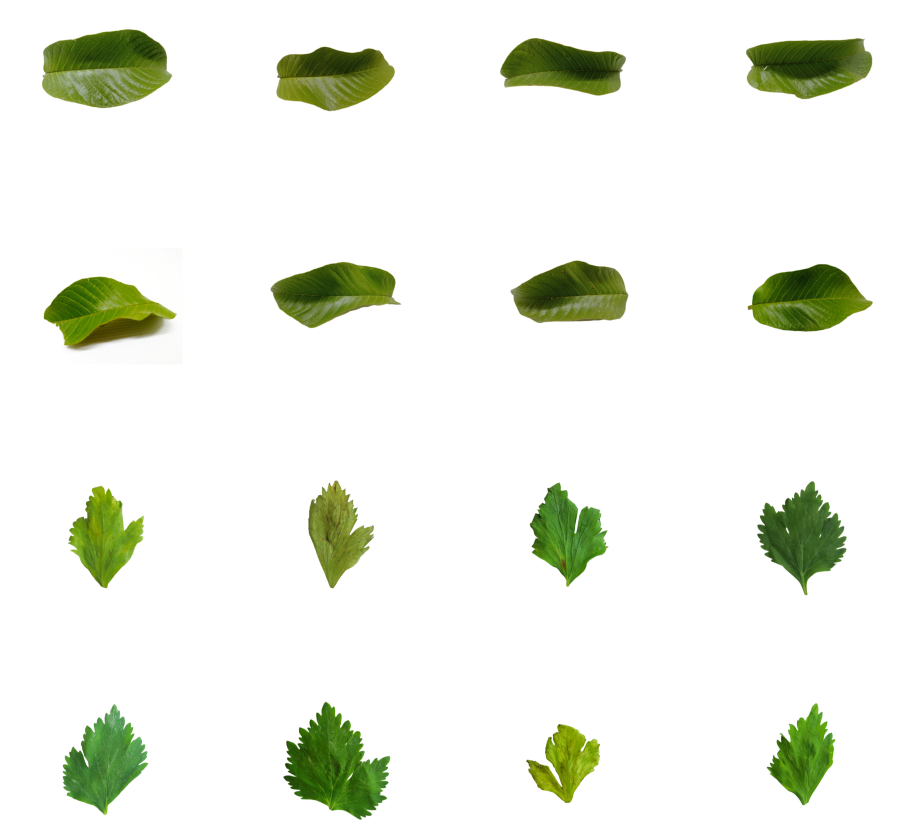

In [ ]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(Daun_Jambu_Biji_dir, fname) 
                for fname in os.listdir(Daun_Jambu_Biji_dir)[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(Daun_Seledri_dir, fname) 
                for fname in os.listdir(Daun_Seledri_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import cv2
import numpy as np

# Gather data daun jambu biji
Jambu_Biji_data = []
Jambu_Biji_label = []
for r, d, f in os.walk(Daun_Jambu_Biji_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            Jambu_Biji_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            Jambu_Biji_label.append(label)
Jambu_Biji_data = np.array(Jambu_Biji_data)
Jambu_Biji_label = np.array(Jambu_Biji_label)

In [ ]:
# Gather data daun seledri
Seledri_data = []
Seledri_label = []
for r, d, f in os.walk(Daun_Seledri_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            Seledri_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            Seledri_label.append(label)

Seledri_data = np.array(Seledri_data)
Seledri_label = np.array(Seledri_label)

<h3>Data Preprocessing</h3>

In [ ]:
# Tampilkan shape dari data daun jambu biji dan data seledri
print("Data Daun Jambu Biji = ", Jambu_Biji_data.shape)
print("Label Daun Jambu Biji = ", Jambu_Biji_label.shape)
print("Data Daun Seledri = ", Seledri_data.shape)
print("Label Daun Seledri = ", Seledri_label.shape)

Data Daun Jambu Biji =  (50, 150, 150, 3)
Label Daun Jambu Biji =  (50,)
Data Daun Seledri =  (50, 150, 150, 3)
Label Daun Seledri =  (50,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", Jambu_Biji_data[0][0][0])

x_Jambu_Biji = Jambu_Biji_data.astype('float32') / 255.0
x_Seledri = Seledri_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_Jambu_Biji[0][0][0])

Data sebelum di-normalisasi  [255 255 255]
Data setelah di-normalisasi  [1. 1. 1.]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", Jambu_Biji_label[10:20])

lb = LabelEncoder()
y_Jambu_Biji = lb.fit_transform(Jambu_Biji_label)
y_Seledri = lb.fit_transform(Seledri_label)

print("Label setelah di-encoder ", y_Seledri[10:20])

Label sebelum di-encoder  ['Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji'
 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji' 'Daun_Jambu_Biji'
 'Daun_Jambu_Biji' 'Daun_Jambu_Biji']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0]


<h3>Definisikan Model</h3>

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [ ]:
# Tampilkan model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 128)               8640128   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [3]:
H = model.fit(x_Jambu_Biji, y_Jambu_Biji, batch_size=20, epochs=50, validation_data=(x_Seledri, y_Seledri))

NameError: ignored

<h3>Evaluasi Model</h3>

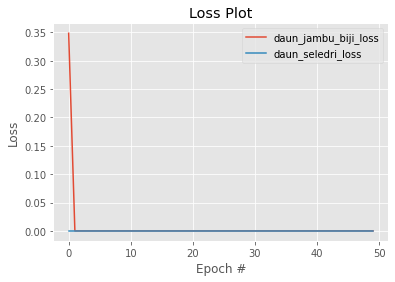

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="daun_jambu_biji_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="daun_seledri_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

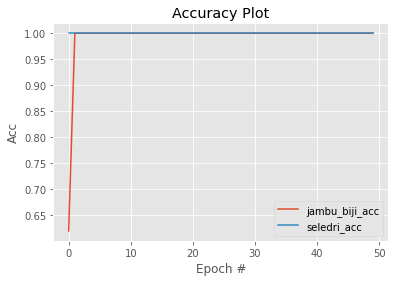

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="jambu_biji_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="seledri_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_Seledri)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_Seledri, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

